<a href="https://colab.research.google.com/github/tr-thitima/Spark_Test/blob/main/spark_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [229]:
!apt-get update                                                                          # อัพเดท Package ทั้งหมดใน VM ตัวนี้
!apt-get install openjdk-8-jdk-headless -qq > /dev/null                                  # ติดตั้ง Java Development Kit (จำเป็นสำหรับการติดตั้ง Spark)
!wget -q https://archive.apache.org/dist/spark/spark-3.1.2/spark-3.1.2-bin-hadoop2.7.tgz   # ติดตั้ง Spark 3.1.2
!tar xzvf spark-3.1.2-bin-hadoop2.7.tgz                                                  # Unzip ไฟล์ Spark 3.1.2
!pip install -q findspark==1.3.0     

Get:1 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Get:2 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Ign:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Hit:4 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease
Ign:5 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:6 http://archive.ubuntu.com/ubuntu bionic InRelease
Hit:7 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release
Hit:8 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Hit:9 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Get:10 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Hit:11 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu bionic InRelease
Get:12 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ Packages [69.5 kB]
Get:13 http://arch

In [230]:
# Set enviroment variable ให้ Python รู้จัก Spark
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.1.2-bin-hadoop2.7"

In [232]:
# ติดตั้ง PySpark ลงใน Python
!pip install pyspark==3.1.2

# ส่วนใหม่

In [234]:
# Server ของ Google Colab มีกี่ Core
!cat /proc/cpuinfo

processor	: 0
vendor_id	: GenuineIntel
cpu family	: 6
model		: 79
model name	: Intel(R) Xeon(R) CPU @ 2.20GHz
stepping	: 0
microcode	: 0x1
cpu MHz		: 2200.158
cache size	: 56320 KB
physical id	: 0
siblings	: 2
core id		: 0
cpu cores	: 1
apicid		: 0
initial apicid	: 0
fpu		: yes
fpu_exception	: yes
cpuid level	: 13
wp		: yes
flags		: fpu vme de pse tsc msr pae mce cx8 apic sep mtrr pge mca cmov pat pse36 clflush mmx fxsr sse sse2 ss ht syscall nx pdpe1gb rdtscp lm constant_tsc rep_good nopl xtopology nonstop_tsc cpuid tsc_known_freq pni pclmulqdq ssse3 fma cx16 pcid sse4_1 sse4_2 x2apic movbe popcnt aes xsave avx f16c rdrand hypervisor lahf_lm abm 3dnowprefetch invpcid_single ssbd ibrs ibpb stibp fsgsbase tsc_adjust bmi1 hle avx2 smep bmi2 erms invpcid rtm rdseed adx smap xsaveopt arat md_clear arch_capabilities
bugs		: cpu_meltdown spectre_v1 spectre_v2 spec_store_bypass l1tf mds swapgs taa
bogomips	: 4400.31
clflush size	: 64
cache_alignment	: 64
address sizes	: 46 bits physical, 48 b

In [235]:
# สร้าง Spark Session เพิ้อใช้งาน Spark
from pyspark.sql import SparkSession
spark = SparkSession.builder.master("local[*]").getOrCreate()

In [236]:
# ดูเวอร์ชั่น Python
import sys
sys.version_info

sys.version_info(major=3, minor=7, micro=12, releaselevel='final', serial=0)

In [237]:
# ดูเวอร์ชั่น Spark
spark.version

'3.1.2'

In [238]:
import pandas as pd
!wget -O covid_case.csv https://data.go.th/dataset/8a956917-436d-4afd-a2d4-59e4dd8e906e/resource/026c8d31-0d51-49b7-9dc2-8373e7cef440/download/confirmed-cases-since-120864.csv

--2021-10-17 06:02:35--  https://data.go.th/dataset/8a956917-436d-4afd-a2d4-59e4dd8e906e/resource/026c8d31-0d51-49b7-9dc2-8373e7cef440/download/confirmed-cases-since-120864.csv
Resolving data.go.th (data.go.th)... 164.115.75.59
Connecting to data.go.th (data.go.th)|164.115.75.59|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 204691216 (195M) [text/csv]
Saving to: ‘covid_case.csv’

covid_case.csv      100%[===================>] 195.21M  1.78MB/s    in 1m 45s  

2021-10-17 06:04:23 (1.85 MB/s) - ‘covid_case.csv’ saved [204691216/204691216]



In [239]:
#อ่านข้อมูลจาก csv file ลงตัวแปร
#dt = spark.read.load("/content/covid_case.csv", format="csv", sep=";", inferSchema="true", header="true")

In [255]:
#อ่านข้อมูลจาก csv file ลงตัวแปร
dt = spark.read.csv('/content/covid_case.csv')

In [256]:
#data profiling ดูลักษณะทั่วไปของข้อมูล
#ดูชนิดข้อมูลแต่ละคอลัมน์
dt.dtypes

[('_c0', 'string'),
 ('_c1', 'string'),
 ('_c2', 'string'),
 ('_c3', 'string'),
 ('_c4', 'string'),
 ('_c5', 'string'),
 ('_c6', 'string'),
 ('_c7', 'string'),
 ('_c8', 'string'),
 ('_c9', 'string'),
 ('_c10', 'string')]

In [257]:
#ดูข้อมูลที่โหลดมา
dt.show()

+------+-------------+-------------+----+---+----+-----------+--------------------+--------------------+-----------------+-----------------+
|   _c0|          _c1|          _c2| _c3|_c4| _c5|        _c6|                 _c7|                 _c8|              _c9|             _c10|
+------+-------------+-------------+----+---+----+-----------+--------------------+--------------------+-----------------+-----------------+
|   No.|announce_date|Notified date| sex|age|Unit|nationality|province_of_isola...|                risk|province_of_onset|district_of_onset|
|816990|    12/8/2021|    11/8/2021| ชาย|  7|  ปี|   Thailand|            เชียงราย|               อื่นๆ|             null|             null|
|816991|    12/8/2021|    11/8/2021| ชาย|  1|  ปี|   Thailand|            เชียงราย|               อื่นๆ|             null|             null|
|816992|    12/8/2021|    11/8/2021| ชาย| 35|  ปี|   Thailand|            เชียงราย|               อื่นๆ|             null|             null|
|816993|    1

In [258]:
#แสดง schema ดูว่าคอลัมน์มีอะไรบ้าง ชนิดอะไร มีคอลัมน์ที่มีค่าที่เป็น null ได้ไหม
dt.printSchema()

root
 |-- _c0: string (nullable = true)
 |-- _c1: string (nullable = true)
 |-- _c2: string (nullable = true)
 |-- _c3: string (nullable = true)
 |-- _c4: string (nullable = true)
 |-- _c5: string (nullable = true)
 |-- _c6: string (nullable = true)
 |-- _c7: string (nullable = true)
 |-- _c8: string (nullable = true)
 |-- _c9: string (nullable = true)
 |-- _c10: string (nullable = true)



In [259]:
#นับแถว นับคอลัมน์
print((dt.count(), len(dt.columns)))

(934732, 11)


In [260]:
#ดูค่าสถิติเบื้องต้น
dt.describe().show() 

+-------+-----------------+-------------+-------------+------+------------------+------+------+--------------------+-------------------+----------------+---------------+
|summary|              _c0|          _c1|          _c2|   _c3|               _c4|   _c5|   _c6|                 _c7|                _c8|             _c9|           _c10|
+-------+-----------------+-------------+-------------+------+------------------+------+------+--------------------+-------------------+----------------+---------------+
|  count|           934732|       934717|       934717|894565|            867186|867183|865830|              934717|             934716|          800369|         788828|
|   mean|        1284347.5|         null|         null|  null|35.422481419766264|  null|  null|                null|               null|            null|            0.0|
| stddev|269829.4114454538|         null|         null|  null|  18.4407095365128|  null|  null|                null|               null|            nu

In [261]:
#แสดงคอลัมน์
dt.columns

['_c0', '_c1', '_c2', '_c3', '_c4', '_c5', '_c6', '_c7', '_c8', '_c9', '_c10']

In [262]:
#นับจำนวนแถวที่ unique 
dt.distinct().count() 

934718

In [263]:
#check type
type(dt)

pyspark.sql.dataframe.DataFrame

In [295]:
#check missing value
dt.summary("count").show()

+-------+------+------+------+------+------+------+------+------+------+------+------+
|summary|   _c0|   _c1|   _c2|   _c3|   _c4|   _c5|   _c6|   _c7|   _c8|   _c9|  _c10|
+-------+------+------+------+------+------+------+------+------+------+------+------+
|  count|934732|934717|934717|894565|867186|867183|865830|934717|934716|800369|788828|
+-------+------+------+------+------+------+------+------+------+------+------+------+



In [264]:
#EDA-Exploratory Data Analysis 
#Non-Graphical EDA
#ค้นหาข้อมูลที่เป็นตัวเลข เช่น ค้นหาข้อมูลผู้ป่วยที่อายุน้อยกว่า 40 ปี
dt.where(dt._c4.astype('int') < 40).show()

+------+---------+---------+----+---+---+--------+--------+--------------------+----+----+
|   _c0|      _c1|      _c2| _c3|_c4|_c5|     _c6|     _c7|                 _c8| _c9|_c10|
+------+---------+---------+----+---+---+--------+--------+--------------------+----+----+
|816990|12/8/2021|11/8/2021| ชาย|  7| ปี|Thailand|เชียงราย|               อื่นๆ|null|null|
|816991|12/8/2021|11/8/2021| ชาย|  1| ปี|Thailand|เชียงราย|               อื่นๆ|null|null|
|816992|12/8/2021|11/8/2021| ชาย| 35| ปี|Thailand|เชียงราย|               อื่นๆ|null|null|
|816993|12/8/2021|11/8/2021|หญิง| 33| ปี|Thailand|เชียงราย|               อื่นๆ|null|null|
|816994|12/8/2021|11/8/2021|หญิง| 14| ปี|Thailand|เชียงราย|สัมผัสใกล้ชิดกับผ...|null|null|
|816995|12/8/2021|11/8/2021| ชาย| 39| ปี|Thailand|เชียงราย|               อื่นๆ|null|null|
|816997|12/8/2021|11/8/2021|หญิง| 32| ปี|Thailand|เชียงราย|               อื่นๆ|null|null|
|816998|12/8/2021|11/8/2021|หญิง|  7| ปี|Thailand|เชียงราย|               อื่นๆ|null|null|

In [265]:
#ค้นหาข้อมูลที่เป็นตัวหนังสือ เช่น จังหวัดเชียงใหม่มีผู้ป่วยโควิดหรือไม่
dt.where(dt._c7 == "เชียงใหม่").show()

+------+---------+---------+----+---+---+--------+---------+--------------------+----+----+
|   _c0|      _c1|      _c2| _c3|_c4|_c5|     _c6|      _c7|                 _c8| _c9|_c10|
+------+---------+---------+----+---+---+--------+---------+--------------------+----+----+
|817024|12/8/2021|11/8/2021| ชาย| 45| ปี|Thailand|เชียงใหม่|               อื่นๆ|null|null|
|817025|12/8/2021|11/8/2021| ชาย|  1| ปี|Thailand|เชียงใหม่|สัมผัสใกล้ชิดกับผ...|null|null|
|817026|12/8/2021|11/8/2021| ชาย|  4| ปี|Thailand|เชียงใหม่|สัมผัสใกล้ชิดกับผ...|null|null|
|817027|12/8/2021|11/8/2021|หญิง| 24| ปี|    null|เชียงใหม่|สัมผัสใกล้ชิดกับผ...|null|null|
|817028|12/8/2021|11/8/2021| ชาย| 33| ปี|    null|เชียงใหม่|สัมผัสใกล้ชิดกับผ...|null|null|
|817029|12/8/2021|11/8/2021|หญิง| 63| ปี|Thailand|เชียงใหม่|สัมผัสใกล้ชิดกับผ...|null|null|
|817030|12/8/2021|11/8/2021|หญิง| 44| ปี|Thailand|เชียงใหม่|สัมผัสใกล้ชิดกับผ...|null|null|
|817031|12/8/2021|11/8/2021| ชาย| 37| ปี|Thailand|เชียงใหม่|สัมผัสใกล้ชิดกับผ...

In [266]:
#ดูข้อมูลวันที่ว่าจัดเก็บอย่างไร
dt.select("_c1").show()

+-------------+
|          _c1|
+-------------+
|announce_date|
|    12/8/2021|
|    12/8/2021|
|    12/8/2021|
|    12/8/2021|
|    12/8/2021|
|    12/8/2021|
|    12/8/2021|
|    12/8/2021|
|    12/8/2021|
|    12/8/2021|
|    12/8/2021|
|    12/8/2021|
|    12/8/2021|
|    12/8/2021|
|    12/8/2021|
|    12/8/2021|
|    12/8/2021|
|    12/8/2021|
|    12/8/2021|
+-------------+
only showing top 20 rows



In [267]:
dt.select("_c2").show()

+-------------+
|          _c2|
+-------------+
|Notified date|
|    11/8/2021|
|    11/8/2021|
|    11/8/2021|
|    11/8/2021|
|    11/8/2021|
|    11/8/2021|
|    11/8/2021|
|    11/8/2021|
|    11/8/2021|
|    11/8/2021|
|    11/8/2021|
|    11/8/2021|
|    11/8/2021|
|    11/8/2021|
|    11/8/2021|
|    11/8/2021|
|    11/8/2021|
|    11/8/2021|
|    11/8/2021|
+-------------+
only showing top 20 rows



In [324]:
#Graphical EDA ดูข้อมูลในรูปแบบกราฟ โดยใช้แพคเกจ seaborn,matplotlib,pandas เพื่อ plot data
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [269]:
#แปลง spark dataframe to pandas dataframe
dt_pd=dt.toPandas()

In [270]:
#view some record
dt_pd.head()

,_c0,_c1,_c2,_c3,_c4,_c5,_c6,_c7,_c8,_c9,_c10
0,No.,announce_date,Notified date,sex,age,Unit,nationality,province_of_isolation,risk,province_of_onset,district_of_onset
1,816990,12/8/2021,11/8/2021,ชาย,7,ปี,Thailand,เชียงราย,อื่นๆ,None,None
2,816991,12/8/2021,11/8/2021,ชาย,1,ปี,Thailand,เชียงราย,อื่นๆ,None,None
3,816992,12/8/2021,11/8/2021,ชาย,35,ปี,Thailand,เชียงราย,อื่นๆ,None,None
4,816993,12/8/2021,11/8/2021,หญิง,33,ปี,Thailand,เชียงราย,อื่นๆ,None,None


In [271]:
dt_pd['_c4'].describe

<bound method NDFrame.describe of 0         age
1           7
2           1
3          35
4          33
         ... 
934727     40
934728     28
934729     29
934730     50
934731     44
Name: _c4, Length: 934732, dtype: object>

In [277]:
#remove first row due to it displays heading name
rows=0
dt_pd.drop(rows,axis=0,inplace=True)

In [278]:
#view data again
dt_pd.head()

,_c0,_c1,_c2,_c3,_c4,_c5,_c6,_c7,_c8,_c9,_c10
1,816990,12/8/2021,11/8/2021,ชาย,7,ปี,Thailand,เชียงราย,อื่นๆ,None,None
2,816991,12/8/2021,11/8/2021,ชาย,1,ปี,Thailand,เชียงราย,อื่นๆ,None,None
3,816992,12/8/2021,11/8/2021,ชาย,35,ปี,Thailand,เชียงราย,อื่นๆ,None,None
4,816993,12/8/2021,11/8/2021,หญิง,33,ปี,Thailand,เชียงราย,อื่นๆ,None,None
5,816994,12/8/2021,11/8/2021,หญิง,14,ปี,Thailand,เชียงราย,สัมผัสใกล้ชิดกับผู้ป่วยยืนยันรายก่อนหน้านี้,None,None


In [287]:
#convert _c4 column from string to integer
dt_pd['_c4'] = pd.to_numeric(dt_pd['_c4'])



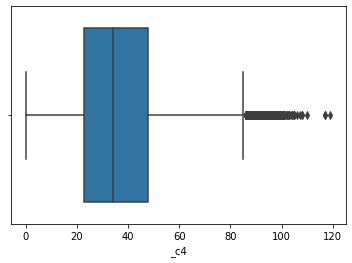

In [281]:
# Boxplot - แสดงการกระจายตัวของข้อมูลตัวเลข (_c4 colum contains age)
sns.boxplot(x = dt_pd['_c4'])

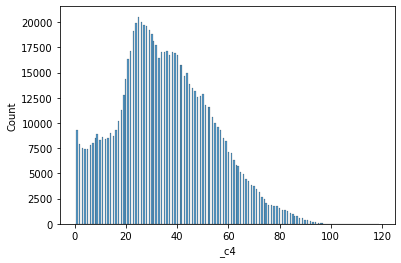

In [282]:
#histogram - แสดงการกระจายตัวของข้อมูลตัวเลข  (_c4 colum contains age)
sns.histplot(dt_pd['_c4'])

In [317]:
#check ว่ามี announce_date เป็นค่าว่าง หรือไม่
dt_pd.where( dt_pd._c1.isnull())
#ค้นหาแถวที่ announce_date เป็นค่าว่าง จะไม่นำมาพิจารณา
problem_idx = dt_pd[dt_pd._c1.isnull()].index
problem_idx

Int64Index([607540, 607542, 607544, 607546, 607548, 607550, 607552, 607554,
            607556, 650161, 650163, 650165, 650169, 650175, 650177],
           dtype='int64')

In [318]:
#ดูข้อมูลแถวที่มีปัญหา
dt_pd.loc[problem_idx]

,_c0,_c1,_c2,_c3,_c4,_c5,_c6,_c7,_c8,_c9,_c10
607540,"""",None,None,None,NaN,None,None,None,None,None,None
607542,"""",None,None,None,NaN,None,None,None,None,None,None
607544,"""",None,None,None,NaN,None,None,None,None,None,None
607546,"""",None,None,None,NaN,None,None,None,None,None,None
607548,"""",None,None,None,NaN,None,None,None,None,None,None
607550,"""",None,None,None,NaN,None,None,None,None,None,None
607552,"""",None,None,None,NaN,None,None,None,None,None,None
607554,"""",None,None,None,NaN,None,None,None,None,None,None
607556,"""",None,None,None,NaN,None,None,None,None,None,None
650161,"""",None,None,None,NaN,None,None,None,None,None,None


In [319]:
#ทำการลบแถวที่มีปัญหา
dt_pd.drop(problem_idx,inplace=True)

In [320]:
#recheck ว่าแถวที่ _c1 (announce_date) เป็นค่าว่างโดนลบไปรึยัง
problem_idx2 = dt_pd[dt_pd._c1.isnull()].index
problem_idx2

Int64Index([], dtype='int64')

In [321]:
#ค้นหาข้อมูลอายุแปลกปลอม
dt_clean_pd = dt_clean.toPandas()

In [326]:
#remove first row due to it displays heading name
rows=0
dt_clean_pd.drop(rows,axis=0,inplace=True)

In [327]:
#view data again
dt_clean_pd.head()

,_c0,_c1,_c2,_c3,_c4,_c5,_c6,_c7,_c8,_c9,_c10,announce_date2
1,816990,12/8/2021,11/8/2021,ชาย,7,ปี,Thailand,เชียงราย,อื่นๆ,None,None,None
2,816991,12/8/2021,11/8/2021,ชาย,1,ปี,Thailand,เชียงราย,อื่นๆ,None,None,None
3,816992,12/8/2021,11/8/2021,ชาย,35,ปี,Thailand,เชียงราย,อื่นๆ,None,None,None
4,816993,12/8/2021,11/8/2021,หญิง,33,ปี,Thailand,เชียงราย,อื่นๆ,None,None,None
5,816994,12/8/2021,11/8/2021,หญิง,14,ปี,Thailand,เชียงราย,สัมผัสใกล้ชิดกับผู้ป่วยยืนยันรายก่อนหน้านี้,None,None,None


In [328]:
#แปลงอายุจากสตริงเป็นตัวเลขอีกครั้ง 
dt_clean_pd['_c4'] = pd.to_numeric(dt_clean_pd['_c4'])

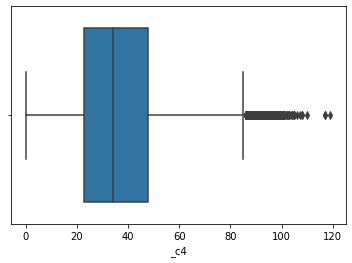

In [332]:
#ค้นหา outlier ของอายุ
sns.boxplot(x = dt_clean_pd['_c4'])

In [333]:
#ค้นหาว่าวันไหนที่พบผู้ติดเชื้อแล้วผู้ติดเชื้ออายุมากกว่า 110 ปีบ้าง
dt_clean.where( dt_clean._c4 > 110 ).select("_c1").distinct().show()

+---------+
|      _c1|
+---------+
|13/8/2021|
|27/8/2021|
+---------+



In [334]:
# แปลงข้อมูลจาก Spark DataFrame ให้เป็น TempView ก่อน
dt.createOrReplaceTempView("data")
dt_sql = spark.sql("SELECT * FROM data")
dt_sql.show()

+------+-------------+-------------+----+---+----+-----------+--------------------+--------------------+-----------------+-----------------+
|   _c0|          _c1|          _c2| _c3|_c4| _c5|        _c6|                 _c7|                 _c8|              _c9|             _c10|
+------+-------------+-------------+----+---+----+-----------+--------------------+--------------------+-----------------+-----------------+
|   No.|announce_date|Notified date| sex|age|Unit|nationality|province_of_isola...|                risk|province_of_onset|district_of_onset|
|816990|    12/8/2021|    11/8/2021| ชาย|  7|  ปี|   Thailand|            เชียงราย|               อื่นๆ|             null|             null|
|816991|    12/8/2021|    11/8/2021| ชาย|  1|  ปี|   Thailand|            เชียงราย|               อื่นๆ|             null|             null|
|816992|    12/8/2021|    11/8/2021| ชาย| 35|  ปี|   Thailand|            เชียงราย|               อื่นๆ|             null|             null|
|816993|    1

In [335]:
# ค้นหา possible value สำหรับข้อมูลหน่วยอายุ ว่านอกจาก ปี แล้วยังมีหน่วยใดอีก
dt_sql_c5 = spark.sql("""
SELECT distinct _c5
FROM data
ORDER BY _c5
""")
dt_sql_c5.show(100)

+-----+
|  _c5|
+-----+
| null|
| Unit|
|   ปี|
|  วัน|
|เดือน|
+-----+

